# VISUALIZACION DE DATOS EN PYTHON]

# 1. CARGAR Y VISUALIZAR TABLA

In [41]:
#libreria para el manejo de datos
import pandas as pd
#El uso de plotly permite analizar los graficos pasando el mouse sobre ellas
#Tambien se puede dimensionar el grafico a conveniencia 
import plotly.express as px 

In [42]:
#cargar archivo csv
data=pd.read_csv("Archivo1_Datos.csv", sep=";", encoding="latin-1")
#visualizar archivos 
data.head(5)

,orden_id,order_item_id,producto_id,vendedor_id,fecha_envio_limite,precio,valor_flete,codigo_postal_vendedor,ciudad_vendedor,departamento_vendedor,nombre_categoria_producto,longitud_nombre_producto,longitud_descripcion_producto,cantidad_fotos_producto,peso_g_producto,longitud_cm_producto,altura_cm_producto,ancho_cm_producto
0,107500PO59A,A,PO59,VE5389,07/04/2018 18:12,271.86,30.72,52435,Mallama,Nariño,Productos ecoamigables,6,7,27,2486,17,11,14
1,37493PS22B,B,PS22,VE1558,20/10/2017 09:07,115.73,4.68,52203,Colon,Nariño,Carnicería,10,31,20,256,43,2,21
2,28050PK20B,B,PK20,VE9159,17/08/2017 08:15,432.99,82.70,66001,Pereira,Risaralda,Deportes,25,5,4,5270,9,27,29
3,52187PA10A,A,PA10,VE3159,23/09/2017 23:27,108.38,35.39,52435,Mallama,Nariño,Electrodomésticos,10,1,6,734,46,48,22
4,84639PR12A,A,PR12,VE5090,07/01/2018 11:50,51.50,11.10,73001,Ibague,Tolima,Frutas y verduras,23,16,35,884,45,26,18


## 2. GRAFICO DE BARRAS

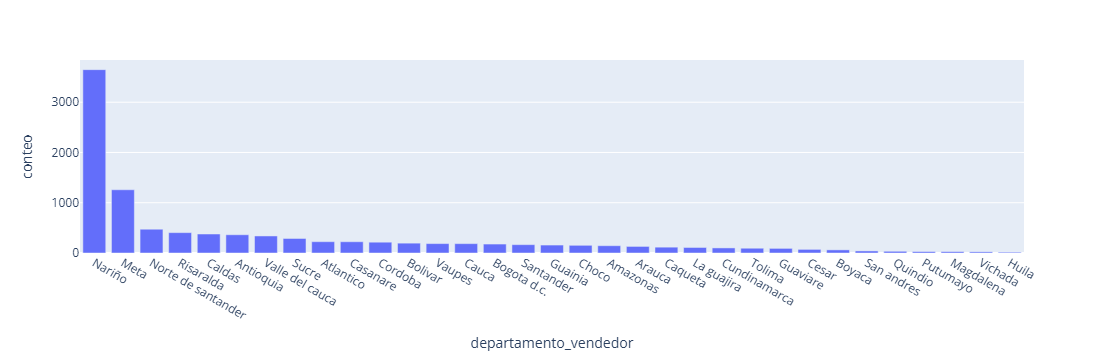

In [43]:
#Creamos y usamos la tabla de frecuencia para la visualizacion del gráfico 
data_estado=data["departamento_vendedor"].value_counts().reset_index()
#cambiamos el nombre de la columna 
data_estado.columns=("departamento_vendedor", "conteo")
fig_1=px.bar(data_estado, x="departamento_vendedor",y="conteo")
fig_1.show()

## 3. Grafico de barras agrupadas


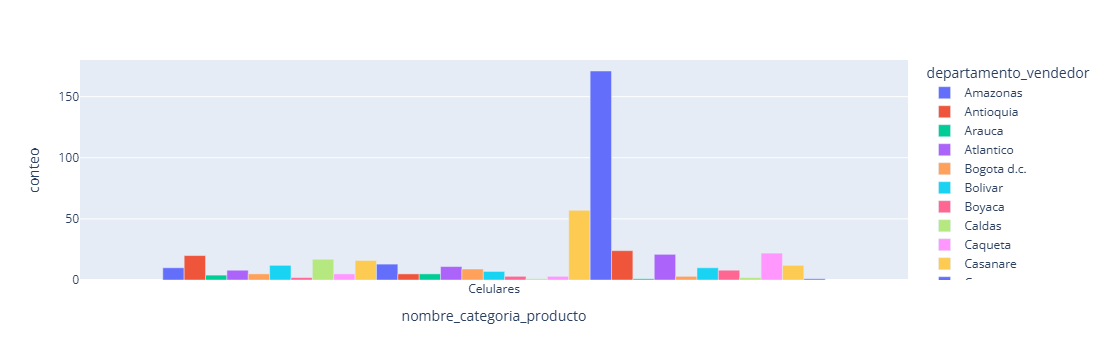

In [44]:
#Arreglar los datos 
data_producto=data.groupby(["departamento_vendedor","nombre_categoria_producto"]).count().reset_index()[["orden_id","departamento_vendedor","nombre_categoria_producto"]]
#cambiar el nombre de las columnas
data_producto=data_producto.rename(columns={"orden_id":"conteo"})
#filtrar por ciertos productos
data_producto=data_producto[data_producto["nombre_categoria_producto"]=="Celulares"]
fig2=px.bar(data_producto, x="nombre_categoria_producto", y="conteo", color="departamento_vendedor", barmode="group")
fig2.show()

## 4. Grafico de barras apiladas

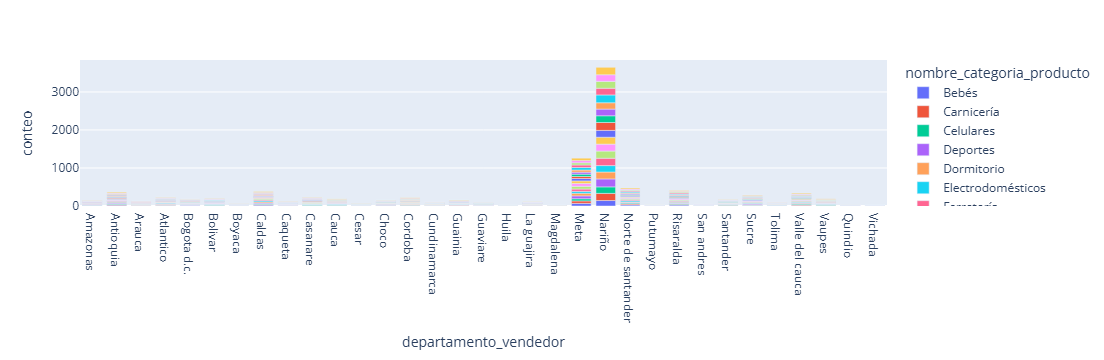

In [45]:
#Arreglar los datos 
data_estado=data.groupby(["departamento_vendedor","nombre_categoria_producto"]).count()[["orden_id"]].reset_index()
#cambiar el nombre de las columnas
data_estado=data_estado.rename(columns={"orden_id":"conteo"})
fig3=px.bar(data_estado, x="departamento_vendedor", y="conteo", color="nombre_categoria_producto")
fig3.show()

## 5. Barras apiladas normalizadas 


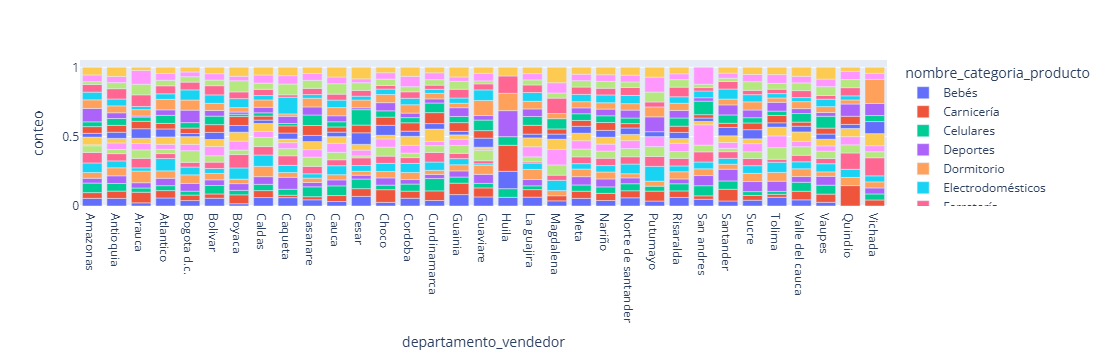

In [46]:
#Arreglar los datos 
data_normalizada=data.groupby(["departamento_vendedor","nombre_categoria_producto"]).agg({"orden_id":"count"})
state=data.groupby(["departamento_vendedor"]).agg({"orden_id":"count"})
#Normalizar datos
data_normalizada=data_normalizada.div(state, level="departamento_vendedor").reset_index()
data_normalizada=data_normalizada.rename(columns={"orden_id":"conteo"})
fig4=px.bar(data_normalizada, x="departamento_vendedor", y="conteo", color="nombre_categoria_producto")
fig4.show()

## 6. Histograma

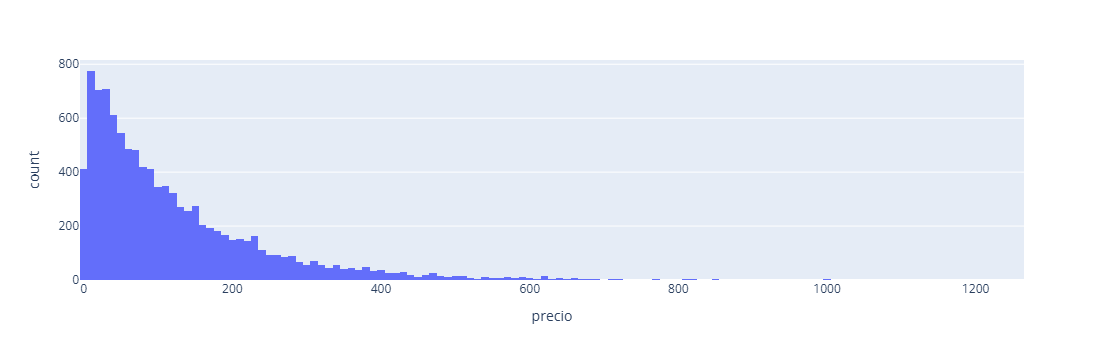

In [47]:
fig5=px.histogram(data,x="precio")
fig5.show()

## 7. Boxplot

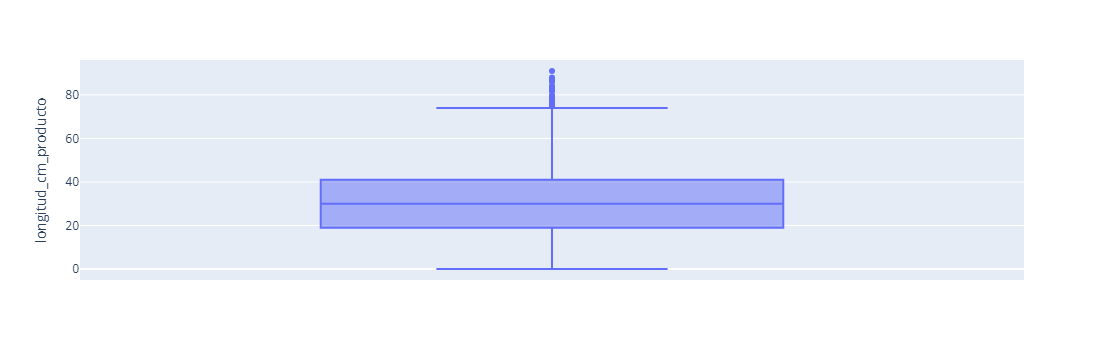

In [53]:
fig6=px.box(data,y="longitud_cm_producto")
fig6.show()

## 8. Box plot agrupado

In [49]:
#Agrupar los datos 
#Revisar las 5 categorias vendidas
categorias_principales=data["nombre_categoria_producto"].value_counts()[0:5]
categorias_principales

nombre_categoria_producto
Tecnología           543
Deportes             537
Frutas y verduras    532
Carnicería           523
Ropa de adultos      521
Name: count, dtype: int64

In [50]:
#Tomar los nombres de las categorias 
categorias_principales=categorias_principales.index
#Filtrar los nombres de estas categorias en la data principal 
data_categoria=data[data["nombre_categoria_producto"].isin(categorias_principales)]
data_categoria

,orden_id,order_item_id,producto_id,vendedor_id,fecha_envio_limite,precio,valor_flete,codigo_postal_vendedor,ciudad_vendedor,departamento_vendedor,nombre_categoria_producto,longitud_nombre_producto,longitud_descripcion_producto,cantidad_fotos_producto,peso_g_producto,longitud_cm_producto,altura_cm_producto,ancho_cm_producto
1,37493PS22B,B,PS22,VE1558,20/10/2017 09:07,115.73,4.68,52203,Colon,Nariño,Carnicería,10,31,20,256,43,2,21
2,28050PK20B,B,PK20,VE9159,17/08/2017 08:15,432.99,82.70,66001,Pereira,Risaralda,Deportes,25,5,4,5270,9,27,29
4,84639PR12A,A,PR12,VE5090,07/01/2018 11:50,51.50,11.10,73001,Ibague,Tolima,Frutas y verduras,23,16,35,884,45,26,18
5,73003PS37A,A,PS37,VE3806,09/12/2017 16:52,132.51,33.68,52356,Ipiales,Nariño,Carnicería,13,19,29,811,29,9,16
6,41673PB76A,A,PB76,VE2456,11/02/2018 20:04,420.95,12.19,52240,Chachagui,Nariño,Ropa de adultos,8,37,24,621,26,41,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,14269PR49B,B,PR49,VE2305,17/08/2017 22:47,258.80,10.45,52207,Consaca,Nariño,Frutas y verduras,17,15,25,1065,27,11,0
10121,89184PR21C,C,PR21,VE2561,08/03/2018 20:40,57.32,79.66,81001,Arauca,Arauca,Frutas y verduras,13,32,38,706,1,18,27
10124,60938PR43A,A,PR43,VE7866,16/07/2017 20:28,189.02,19.95,17001,Manizales,Caldas,Frutas y verduras,37,15,27,8064,34,13,17
10127,58398PK12A,A,PK12,VE5445,27/10/2017 22:10,40.51,18.96,50001,Villavicencio,Meta,Deportes,8,26,23,2208,10,8,22


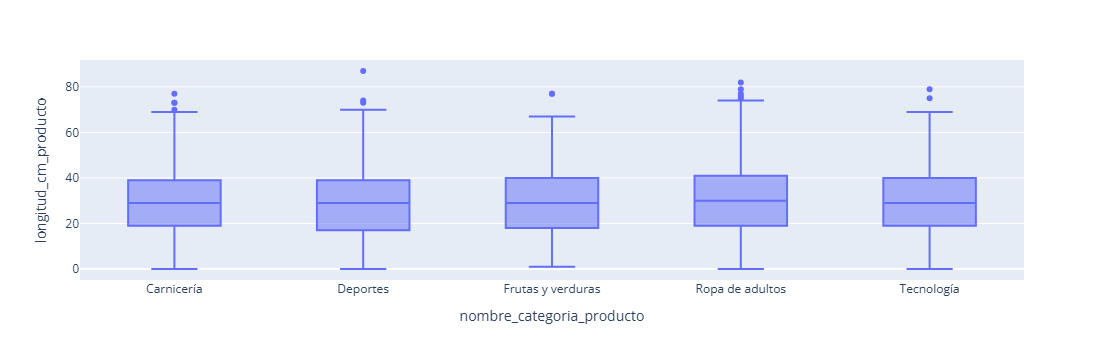

In [54]:
#grafico con los datos filtrados
fig7=px.box(data_categoria, x="nombre_categoria_producto", y="longitud_cm_producto")
fig7.show()